# Extracción Datos PLANETAS CONFIRMADOS

In [599]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
from lightkurve import search_lightcurvefile
from astropy.io import fits
import numpy as np
import pandas as pd 

In [600]:
LC = lk.search_lightcurvefile("TOI 677.01", mission="TESS").download_all()
LC

LightCurveFileCollection of 2 objects:
	TIC 280206394 (2 TessLightCurveFiles) Sectors: 9,10

In [601]:
period, t0, duration_hours = 11.23682,1547.473755,2.567844

In [602]:
lc_raw = LC.PDCSAP_FLUX.stitch()
lc_raw.flux.shape

(35342,)

In [603]:
lc_clean = lc_raw.remove_outliers(sigma=20, sigma_upper=4)

In [604]:
#Original
temp_fold = lc_clean.fold(period, t0=t0)
fractional_duration = (duration_hours / 24.0) / period
phase_mask = np.abs(temp_fold.phase) < (fractional_duration * 1.5) 
transit_mask = np.in1d(lc_clean.time, temp_fold.time_original[phase_mask])

In [605]:
lc_flat, trend_lc = lc_clean.flatten(return_trend=True, mask=transit_mask)

In [606]:
lc_fold = lc_flat.fold(period, t0=t0)

In [607]:
#Aquí cambio el bin , y le quito el normalize, porque ya estaba normalizado.
lc_global = lc_fold.bin(bins=1001, method='median') - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1
lc_global.flux.shape

(1001,)

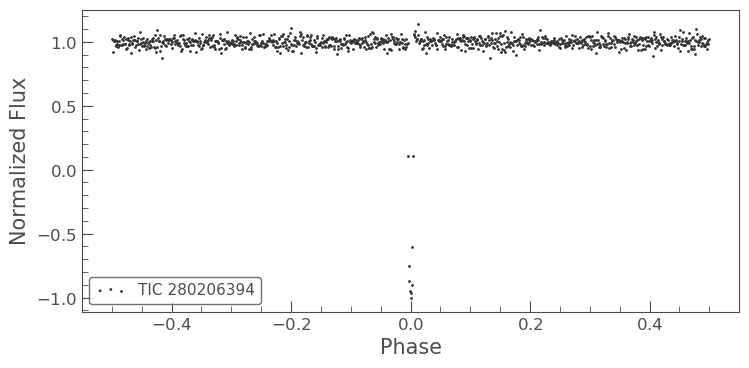

In [608]:
lc_global.scatter();

In [609]:
phase_mask = (lc_fold.phase > -4*fractional_duration) & (lc_fold.phase < 4.0*fractional_duration)
lc_zoom = lc_fold[phase_mask]

In [610]:
lc_local = lc_zoom.bin(bins=101, method='median') -1
lc_local = (lc_local / np.abs(lc_local.flux.min()) ) * 2.0 + 1
lc_local.flux.shape

(101,)

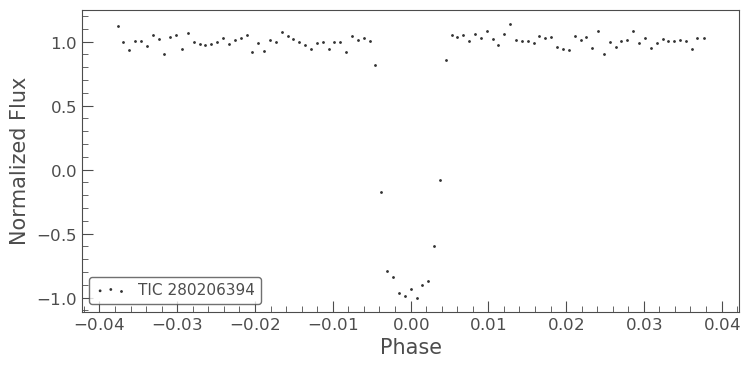

In [611]:
lc_local.scatter();

In [612]:
pd.DataFrame(lc_global.flux).to_csv("C:/Users/Irene/Documents/INICIO/Máster Big Data/TFM/TESS/Confirmed Planets/677.01_Global.csv")

In [613]:
pd.DataFrame(lc_local.flux).to_csv("C:/Users/Irene/Documents/INICIO/Máster Big Data/TFM/TESS/Confirmed Planets/677.01_Local.csv")